In [1]:
import pandas as pd

데이터 : 서울시의 2022년 승객수 데이터, 기준은 __승차__ 총승객수 설정함

In [2]:
DF = pd.read_csv("CARD_SUBWAY_MONTH_2022.csv", encoding="CP949", index_col = False) 
# False 안하면 사용일자 value들이 index로 잡힘
DF

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20220101,3호선,수서,7370,7076,20220104
1,20220101,3호선,학여울,461,473,20220104
2,20220101,3호선,대청,3224,2903,20220104
3,20220101,3호선,일원,3321,2803,20220104
4,20220101,경원선,창동,1,0,20220104
...,...,...,...,...,...,...
219740,20221231,4호선,신용산,11025,12099,20230103
219741,20221231,경부선,석수,5643,5147,20230103
219742,20221231,경부선,금천구청,7519,7426,20230103
219743,20221231,경부선,가산디지털단지,5579,7299,20230103


In [3]:
DF = DF.drop(["사용일자", "노선명", "등록일자"], axis=1) # 불필요한 col 제거
DF

,역명,승차총승객수,하차총승객수
0,수서,7370,7076
1,학여울,461,473
2,대청,3224,2903
3,일원,3321,2803
4,창동,1,0
...,...,...,...
219740,신용산,11025,12099
219741,석수,5643,5147
219742,금천구청,7519,7426
219743,가산디지털단지,5579,7299


# 1. 각 지하철 역별 평균 이용객수

In [4]:
DF.groupby("역명").mean()

,승차총승객수,하차총승객수
역명,,
4.19민주묘지,3092.063014,2916.430137
가능,6155.139726,5891.709589
가락시장,7328.176712,7643.024658
가산디지털단지,25051.253425,26193.217808
가양,18684.052055,18126.961644
...,...,...
회기,23727.701370,22899.827397
회룡,11530.824658,11404.904110
회현(남대문시장),21749.413699,22686.336986


# 2.각 지하철 역별 이용객수의 표준 편차

In [33]:
DF.groupby("역명").std()

,승차총승객수,하차총승객수
역명,,
4.19민주묘지,904.788072,953.688798
가능,1337.236308,1303.864408
가락시장,2229.052877,2188.382860
가산디지털단지,16277.238298,15770.354985
가양,4958.538314,4841.355218
...,...,...
회기,5312.219837,4959.183112
회룡,2479.220298,2439.667619
회현(남대문시장),6633.408654,6982.421302


# 3. 가장 많은 이용객이 있는 역의 이용객 수

In [82]:
DF.sort_values(by = ["승차총승객수"], ascending=False).head(1).iloc[0,1]

122543

# 4. 가장 적은 이용객이 있는 역의 이용객 수

In [83]:
DF.sort_values(by = ["승차총승객수"], ascending=True).head(1).iloc[0,1]

1

# 5. 이용객 수가 가장 많은 역의 이름

In [84]:
DF.sort_values(by = ["승차총승객수"], ascending=False).head(1).iloc[0,0]

'잠실(송파구청)'

# 6. 이용객 수가 가장 적은 역의 이름

In [86]:
DF.sort_values(by = ["승차총승객수"], ascending=True).head(1).iloc[0,0]

'충무로'

# 7. 이용객 수의 분포를 히스토그램으로 시각화하세요.

In [5]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 그래프가 notebook 위에 표시
%matplotlib inline

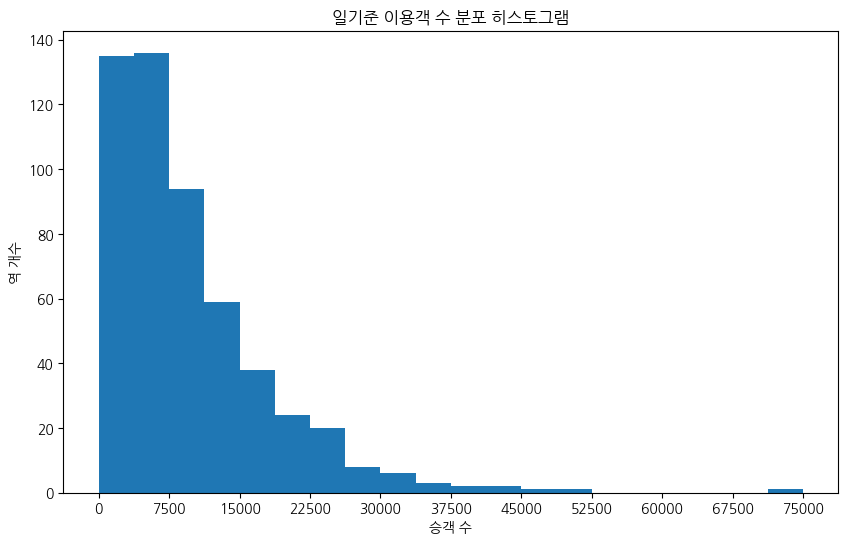

In [21]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 13으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(DF.groupby("역명").mean()["승차총승객수"], bins=20, range=(0, 75000))
# X축에 레이블 부여
ax.set_xlabel('승객 수')
# Y축에 레이블 부여
ax.set_ylabel('역 개수')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 75000, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
# ax.set_yticks(np.arange(0, freq.max()+1))
ax.set_title("일기준 이용객 수 분포 히스토그램")
# 그래프 표시
plt.show()

In [16]:
group_df.sort_values("승차총승객수").tail(10)

,승차총승객수,하차총승객수
역명,,
신림,34790.307033,33778.463122
을지로입구,35698.449315,36332.243836
용산,35982.452055,36369.709589
영등포,38019.835616,39025.389041
잠실(송파구청),41227.127397,41819.486301
역삼,41749.720548,46849.586301
서울대입구(관악구청),42764.202740,41845.646575
삼성(무역센터),46045.909589,46240.441096
구로디지털단지,50550.232877,50327.731507


잠실이 13만 명이나 다녀갔던 날은 코로나 이후 첫 벚꽃축제가 열린 4월 9일... 좀 예외적인 날이었다...